In [1]:
import numpy as np
import pandas as pd

from processing import process_embedding_from_words
from taxonomy import (phi_edge, build_state, proba_state, TaxonomyModule,
                    plot_state_likelihood_and_gradient, plot_nx_graph)

[nltk_data] Downloading package punkt to /home/clement/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Training data

train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat", "metatherian",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "anapsid", "chelonian", "turtle"
]

train_embedd = process_embedding_from_words(train_words)

In [3]:
train_df_graph = pd.DataFrame(index=train_words, columns=train_words)
train_df_graph.loc["vertebrate", "mammal"] = 1
train_df_graph.loc["vertebrate", "reptile"] = 1
train_df_graph.loc["mammal", "placental"] = 1
train_df_graph.loc["mammal", "metatherian"] = 1
train_df_graph.loc["placental", "cow"] = 1
train_df_graph.loc["placental", "rodent"] = 1
train_df_graph.loc["rodent", "squirrel"] = 1
train_df_graph.loc["rodent", "rat"] = 1
train_df_graph.loc["metatherian", "marsupial"] = 1
train_df_graph.loc["marsupial", "kangaroo"] = 1
train_df_graph.loc["reptile", "diapsid"] = 1
train_df_graph.loc["reptile", "anapsid"] = 1
train_df_graph.loc["diapsid", "snake"] = 1
train_df_graph.loc["diapsid", "crocodilian"] = 1
train_df_graph.loc["anapsid", "chelonian"] = 1
train_df_graph.loc["chelonian", "turtle"] = 1
train_df_graph = train_df_graph.fillna(0)

train_df_graph.head()

,vertebrate,mammal,placental,cow,rodent,rat,metatherian,marsupial,kangaroo,reptile,diapsid,squirrel,snake,crocodilian,anapsid,chelonian,turtle
vertebrate,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
mammal,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
placental,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
cow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rodent,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [4]:
w = np.random.randn(train_embedd.shape[-1] + 1)
phi_edge(0, 1, w, train_embedd, y=1), phi_edge(0, 1, w, train_embedd, y=0)

(2.286091072603853, 1)

In [5]:
w = np.random.randn(train_embedd.shape[-1] + 1)
train_state = build_state(train_words, train_df_graph)
proba_state(w, train_state, train_words, train_embedd)

-239.86811528172308

In [6]:
proba_state(np.zeros(11), train_state, train_words, train_embedd), (len(train_words)**2 - len(train_words))*np.log(0.5)

(-188.5360331123055, -188.53603311230512)

### Plots


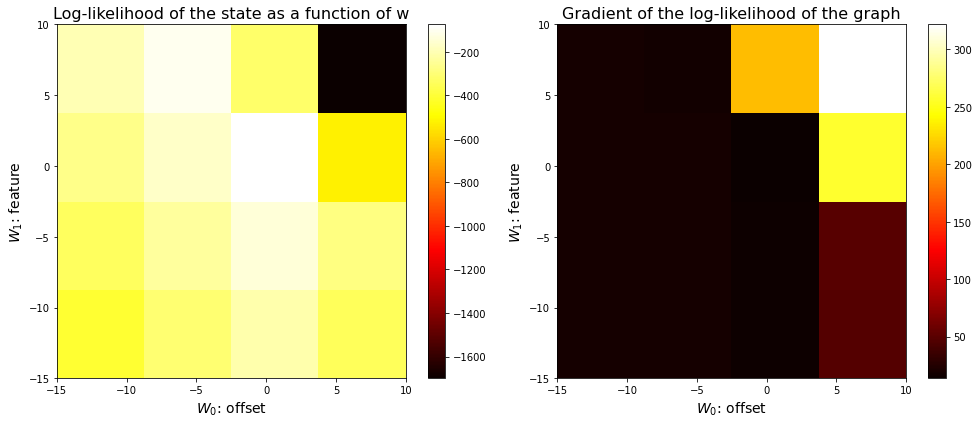

In [7]:
W_X, W_Y = np.meshgrid(np.linspace(-15, 10, 5), np.linspace(-15, 10, 5))

plot_state_likelihood_and_gradient(
    train_state, train_words, train_embedd, W_X, W_Y)

## Visualization

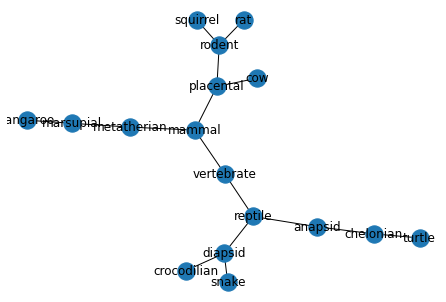

In [8]:
plot_nx_graph(w=np.array([-3, 6]), words=train_words, embedding=np.array(train_df_graph));

### Training procedure

In [9]:
taxonomy_module = TaxonomyModule()

nb_epochs = 5
lr = 0.01
taxonomy_module.train(train_df_graph, nb_epochs, lr)

[Epoch 1]: -346.69
[Epoch 2]: -68.54
[Epoch 3]: -64.56
[Epoch 4]: -63.05
[Epoch 5]: -62.34


In [10]:
taxonomy_module.f1_score(train_df_graph)

0.0

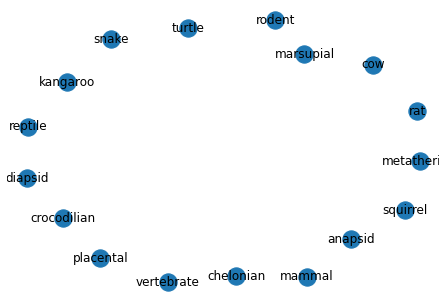

In [11]:
taxonomy_module.infer_graph(train_words);

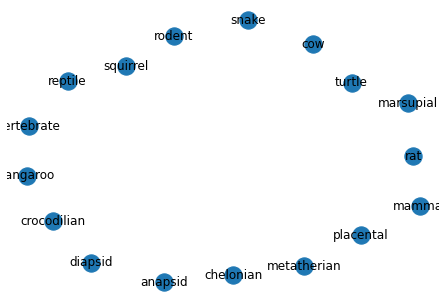

In [12]:
taxonomy_module.infer_graph(train_df_graph);

### Kirchhoff’s Matrix Tree Theorem (MTT)

In [47]:
from networkx.linalg.laplacianmatrix import laplacian_matrix
L_matrix = laplacian_matrix(G).todense()
nb_covering_trees = np.linalg.det(L_matrix[1:,1:])
nb_covering_trees

0.0